In [1]:
import pandas as pd
import os.path
import requests
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LOC = "/pasteur/appa/scratch/jkalfon/data/spcrint_data/"

In [3]:
if not os.path.exists("../data/results_batch.json"):
    url = "https://raw.githubusercontent.com/openproblems-bio/website/main/results/batch_integration/data/results.json"
    response = requests.get(url)

    with open("../data/results_batch.json", "w") as f:
        f.write(response.text)

if not os.path.exists("../data/results_label.json"):
    url = "https://raw.githubusercontent.com/openproblems-bio/website/main/results/label_projection/data/results.json"
    response = requests.get(url)

    with open("../data/results_label.json", "w") as f:
        f.write(response.text)

print("File downloaded successfully!")

File downloaded successfully!


In [4]:
res = {}
with open("../data/results_batch.json", "r") as f:
    data_batch = json.load(f)
for dataset in data_batch:
    dataset_id = dataset["dataset_id"]
    if dataset_id not in res:
        res[dataset_id] = {}
    res[dataset_id].update({dataset["method_id"]: dataset["metric_values"]})

In [5]:
res_label = {}
with open("../data/results_label.json", "r") as f:
    data_label = json.load(f)
for dataset in data_label:
    dataset_id = dataset["dataset_id"]
    if dataset_id not in res_label:
        res_label[dataset_id] = {}
    res_label[dataset_id].update({dataset["method_id"]: dataset["metric_values"]})

res_label.keys()

dict_keys(['cellxgene_census/dkd', 'cellxgene_census/gtex_v9', 'cellxgene_census/hypomap', 'cellxgene_census/immune_cell_atlas', 'cellxgene_census/mouse_pancreas_atlas', 'cellxgene_census/tabula_sapiens', None])

In [8]:
pd.DataFrame(res_label["cellxgene_census/dkd"])

,knn,logistic_regression,majority_vote,mlp,naive_bayes,random_labels,scanvi,scanvi_scarches,scgpt_zeroshot,scimilarity,scimilarity_knn,seurat_transferdata,singler,true_labels,uce,xgboost,geneformer,scgpt_finetuned,scprint
accuracy,0.9490,0.9572,0.2954,0.9540,0.9269,0.1808,0.9570,0.9570,0.8486,0.8869,0.9553,0.9541,0.9147,1,0.1813,0.9644,NA,NA,NA
f1_macro,0.9286,0.9413,0.0351,0.9245,0.9181,0.0774,0.9360,0.9366,0.5239,0.6233,0.9292,0.9344,0.9027,1,0.0743,0.9225,NA,NA,NA
f1_micro,0.9490,0.9572,0.2954,0.9540,0.9269,0.1808,0.9570,0.9570,0.8486,0.8869,0.9553,0.9541,0.9147,1,0.1813,0.9644,NA,NA,NA
f1_weighted,0.9487,0.9567,0.1347,0.9529,0.9296,0.1801,0.9579,0.9567,0.8339,0.8655,0.9556,0.9544,0.9192,1,0.1790,0.9634,NA,NA,NA


In [27]:
res.keys()

dict_keys(['cellxgene_census/dkd', 'cellxgene_census/gtex_v9', 'cellxgene_census/hypomap', 'cellxgene_census/immune_cell_atlas', 'cellxgene_census/mouse_pancreas_atlas', 'cellxgene_census/tabula_sapiens'])

In [30]:
pd.DataFrame(res["cellxgene_census/mouse_pancreas_atlas"]).T

,ari,asw_batch,asw_label,cell_cycle_conservation,clisi,graph_connectivity,hvg_overlap,ilisi,isolated_label_asw,isolated_label_f1,kbet,nmi,pcr
batchelor_fastmnn,0.565,0.8708,0.6043,0.8459,1,0.9719,NA,0.0605,0.7868,0.8543,NA,0.7877,0.2749
batchelor_mnn_correct,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
bbknn,0.7124,NA,NA,NA,0.8328,0.9981,NA,0.1819,NA,0.0779,NA,0.8116,NA
combat,0.565,0.9096,0.552,0.7324,1,0.9465,0.5869,0.032,0.6886,0.7642,NA,0.7488,1
embed_cell_types,1,0.8347,0.9897,0.6823,1,1,NA,0.1427,0.9897,1,0.8545,1,0.0865
embed_cell_types_jittered,1,0.8404,0.9897,0.6818,1,1,NA,0.1426,0.9897,1,0.8496,1,0.0864
geneformer,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
harmony,0.8176,0.8238,0.6033,0.7815,0.9998,0.952,NA,0.0883,0.7305,0.0681,NA,0.788,0.4449
harmonypy,0.8158,0.8291,0.6046,0.7782,0.9997,0.9236,NA,0.0882,0.7223,0.0715,NA,0.7867,0.4441
liger,0.6645,0.6526,0.519,0.5842,0.9883,0.8309,NA,0.1339,0.6471,0.1243,NA,0.6231,0.8296


In [6]:
metrics = {
    "dkd_ref_cls": {
        "accuracy": 0.6050132734327139,
        "macro": 0.45858384601691754,
        "micro": 0.6050132734327139,
        "weighted": 0.5752358078815335,
    },
    "dkd_cls": {
        "accuracy": 0.5608184918529746,
        "macro": 0.49302410982269285,
        "micro": 0.5608184918529746,
        "weighted": 0.5370188034467204,
    },
    "dkd_smooth_cls": {
        "accuracy": 0.5941644562334217,
        "macro": 0.5355514243377841,
        "micro": 0.5941644562334217,
        "weighted": 0.5827613925424003,
    },
    "dkd_clust_cls": {
        "accuracy": 0.5985221674876847,
        "macro": 0.5,
        "micro": 0.5985221674876847,
        "weighted": 0.5985221674876847,
    },
    "gtex_v9_ref_cls": {
        "accuracy": 0.5690731903254497,
        "macro": 0.3561412506114705,
        "micro": 0.5690731903254497,
        "weighted": 0.5111263506144524,
    },
    "gtex_v9_cls": {
        "accuracy": 0.47340980187695514,
        "macro": 0.4771516389245344,
        "micro": 0.47340980187695514,
        "weighted": 0.4105919407683359,
    },
    "gtex_v9_smooth_cls": {
        "accuracy": 0.49930483142161974,
        "macro": 0.45026649672378827,
        "micro": 0.49930483142161974,
        "weighted": 0.46767738060420655,
    },
    "gtex_v9_clust_cls": {
        "accuracy": 0.49930483142161974,
        "macro": 0.45026649672378827,
        "micro": 0.49930483142161974,
        "weighted": 0.46767738060420655,
    },
    "hypomap_ref_cls": {
        "accuracy": 0.9331843865688121,
        "macro": 0.5582565920511067,
        "micro": 0.9331843865688121,
        "weighted": 0.9095025274318423,
    },
    "hypomap_cls": {
        "accuracy": 0.9817518248175182,
        "macro": 0.8017862483599127,
        "micro": 0.9817518248175182,
        "weighted": 0.9743770548339135,
    },
    "hypomap_smooth_cls": {
        "accuracy": 0.9908759124087592,
        "macro": 0.8529747502946833,
        "micro": 0.9908759124087592,
        "weighted": 0.986699566363855,
    },
    "hypomap_clust_cls": {
        "accuracy": 0.9963503649635036,
        "macro": 0.8811979101634128,
        "micro": 0.9963503649635036,
        "weighted": 0.9945824700566079,
    },
    "mouse_pancreas_atlas_ref_cls": {
        "accuracy": 0.9168991697845367,
        "macro": 0.736673219519387,
        "micro": 0.9168991697845367,
        "weighted": 0.8911321328642097,
    },
    "mouse_pancreas_atlas_cls": {
        "accuracy": 0.9222539985171062,
        "macro": 0.7317299769023702,
        "micro": 0.9222539985171062,
        "weighted": 0.8935278968505191,
    },
    "mouse_pancreas_atlas_smooth_cls": {
        "accuracy": 0.9653638385764219,
        "macro": 0.7529330761341159,
        "micro": 0.9653638385764219,
        "weighted": 0.9564964495219883,
    },
    "mouse_pancreas_atlas_clust_cls": {
        "accuracy": 0.9721427814850122,
        "macro": 0.7654463915196114,
        "micro": 0.9721427814850122,
        "weighted": 0.9663853668888627,
    },
}

In [7]:
metrics_v1 = {
    "dkd_ref_cls": {
        "accuracy": 0.4937716969573208,
        "macro": 0.38015219981782045,
        "micro": 0.4937716969573208,
        "weighted": 0.44125553939089207,
    },
    "dkd_cls": {
        "accuracy": 0.4630541871921182,
        "macro": 0.39612779635380635,
        "micro": 0.4630541871921182,
        "weighted": 0.43238258813181274,
    },
    "gtex_v9_ref_cls": {
        "accuracy": 0.662801373334736,
        "macro": 0.45113362926393386,
        "micro": 0.662801373334736,
        "weighted": 0.6076783134412977,
    },
    "gtex_v9_cls": {
        "accuracy": 0.4894855752519986,
        "macro": 0.5275646372211268,
        "micro": 0.4894855752519986,
        "weighted": 0.45377925621844867,
    },
    "hypomap_ref_cls": {
        "accuracy": 0.8986192115347146,
        "macro": 0.5346630203398964,
        "micro": 0.8986192115347146,
        "weighted": 0.8782631897011843,
    },
    "hypomap_cls": {
        "accuracy": 0.9525547445255474,
        "macro": 0.6734592457544935,
        "micro": 0.9525547445255474,
        "weighted": 0.9472890166071732,
    },
    "mouse_pancreas_atlas_ref_cls": {
        "accuracy": 0.6353696705188564,
        "macro": 0.6829825924446588,
        "micro": 0.6353696705188564,
        "weighted": 0.5402847879953743,
    },
    "mouse_pancreas_atlas_cls": {
        "accuracy": 0.7887935600042368,
        "macro": 0.7095144808117735,
        "micro": 0.7887935600042368,
        "weighted": 0.711819695219025,
    },
}

In [8]:
metrics_ft = {
    "hypomap_ref_cls": {
        "accuracy": 0.9918841332727155,
        "macro": 0.7696163027141719,
        "micro": 0.9918841332727155,
        "weighted": 0.9880037265383134,
    },
    "hypomap_cls": {
        "accuracy": 0.9972627737226277,
        "macro": 0.8843677466665826,
        "micro": 0.9972627737226277,
        "weighted": 0.9959127236678834,
    },
    "hypomap_smooth_cls": {
        "accuracy": 0.9963503649635036,
        "macro": 0.8811979101634128,
        "micro": 0.9963503649635036,
        "weighted": 0.9945824700566079,
    },
    "hypomap_clust_cls": {
        "accuracy": 0.9936131386861314,
        "macro": 0.7700867990523016,
        "micro": 0.9936131386861314,
        "weighted": 0.9918452437792358,
    },
    "gtex_v9_ref_cls": {
        "accuracy": 0.9615351510572574,
        "macro": 0.8414327209327331,
        "micro": 0.9615351510572574,
        "weighted": 0.9458130470996915,
    },
    "gtex_v9_cls": {
        "accuracy": 0.9396941258255127,
        "macro": 0.8168550944626127,
        "micro": 0.9396941258255127,
        "weighted": 0.9152628809255811,
    },
    "gtex_v9_smooth_cls": {
        "accuracy": 0.9386513729579423,
        "macro": 0.8107972048727167,
        "micro": 0.9386513729579423,
        "weighted": 0.9154172322630404,
    },
    "gtex_v9_clust_cls": {
        "accuracy": 0.9386513729579423,
        "macro": 0.8107972048727167,
        "micro": 0.9386513729579423,
        "weighted": 0.9154172322630404,
    },
    "dkd_ref_cls": {
        "accuracy": 0.957269756994078,
        "macro": 0.8707964783430515,
        "micro": 0.957269756994078,
        "weighted": 0.9380173819914928,
    },
    "dkd_cls": {
        "accuracy": 0.9607805987116332,
        "macro": 0.8670685465118949,
        "micro": 0.9607805987116332,
        "weighted": 0.9429724166641977,
    },
    "dkd_smooth_cls": {
        "accuracy": 0.962485790071997,
        "macro": 0.8773644732834186,
        "micro": 0.962485790071997,
        "weighted": 0.9455708494744246,
    },
    "dkd_clust_cls": {"accuracy": 1.0, "macro": 1.0, "micro": 1.0, "weighted": 1.0},
    "mouse_pancreas_atlas_ref_cls": {
        "accuracy": 0.9866538805682766,
        "macro": 0.9065043136524673,
        "micro": 0.9866538805682766,
        "weighted": 0.9802076562758316,
    },
    "mouse_pancreas_atlas_cls": {
        "accuracy": 0.9843236945238851,
        "macro": 0.8915384242416656,
        "micro": 0.9843236945238851,
        "weighted": 0.9771898577480528,
    },
    "mouse_pancreas_atlas_smooth_cls": {
        "accuracy": 0.9872894820463934,
        "macro": 0.89033441586772,
        "micro": 0.9872894820463934,
        "weighted": 0.9817127498804611,
    },
    "mouse_pancreas_atlas_clust_cls": {
        "accuracy": 0.9819934328990573,
        "macro": 0.8953801102938492,
        "micro": 0.9819934328990573,
        "weighted": 0.9739455319046344,
    },
}

In [15]:
toplot = {}
names = []
for k, v in res_label.items():
    if k is None:
        continue
    names.append(k.split("/")[1])
    for l, w in v.items():
        if w is None:
            continue
        if l not in toplot:
            toplot[l] = []
        toplot[l].append(w["f1_weighted"])
    m = 0
    for l, w in metrics.items():
        if l.startswith(k.split("/")[1]):
            if w["weighted"] > m and not l.endswith("ref_cls"):
                m = w["weighted"]
    if "scPRINT-2 (zero-shot)" not in toplot:
        toplot["scPRINT-2 (zero-shot)"] = []
    toplot["scPRINT-2 (zero-shot)"].append(m)
    m = 0
    for l, w in metrics_v1.items():
        if l.startswith(k.split("/")[1]):
            if w["weighted"] > m and not l.endswith("ref_cls"):
                m = w["weighted"]
    if "scPRINT-1 (zero-shot)" not in toplot:
        toplot["scPRINT-1 (zero-shot)"] = []
    toplot["scPRINT-1 (zero-shot)"].append(m)
    m = 0
    for l, w in metrics_ft.items():
        if l.startswith(k.split("/")[1]):
            if w["weighted"] > m and not l.endswith("ref_cls"):
                m = w["weighted"]
    if "scPRINT-2 (fine-tune)" not in toplot:
        toplot["scPRINT-2 (fine-tune)"] = []
    toplot["scPRINT-2 (fine-tune)"].append(m)
toplot = pd.DataFrame(data=toplot, index=names).T

In [16]:
toplot = toplot.loc[:, toplot.loc["scPRINT-2 (zero-shot)"].values != 0].drop(
    index=["geneformer", "true_labels", "scgpt_finetuned", "scprint"], errors="ignore"
)

In [17]:
toplot = toplot.apply(pd.to_numeric, errors="coerce").fillna(0)
toplot

,dkd,gtex_v9,hypomap,mouse_pancreas_atlas
knn,0.948700,0.858200,0.995400,0.974400
logistic_regression,0.956700,0.885100,0.996300,0.977000
majority_vote,0.134700,0.011800,0.281000,0.158500
mlp,0.952900,0.789600,0.997200,0.970700
naive_bayes,0.929600,0.793700,0.994600,0.952200
random_labels,0.180100,0.039700,0.317500,0.175500
scanvi,0.957900,0.901900,0.997200,0.976800
scanvi_scarches,0.956700,0.890800,0.996400,0.977400
scgpt_zeroshot,0.833900,0.637500,0.000000,0.000000
scimilarity,0.865500,0.650400,0.000000,0.000000


In [52]:
toplot = toplot.loc[
    [
        "knn",
        "logistic_regression",
        "mlp",
        "xgboost",
        "naive_bayes",
        "scanvi",
        "scanvi_scarches",
        "seurat_transferdata",
        "singler",
        "random_labels",
        "majority_vote",
        "uce",
        "scgpt_zeroshot",
        "scimilarity",
        "scimilarity_knn",
        "scPRINT-1 (zero-shot)",
        "scPRINT-2 (zero-shot)",
        "scPRINT-2 (fine-tune)",
    ]
]

/local/scratch/tmp/ipykernel_3469774/2891185360.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


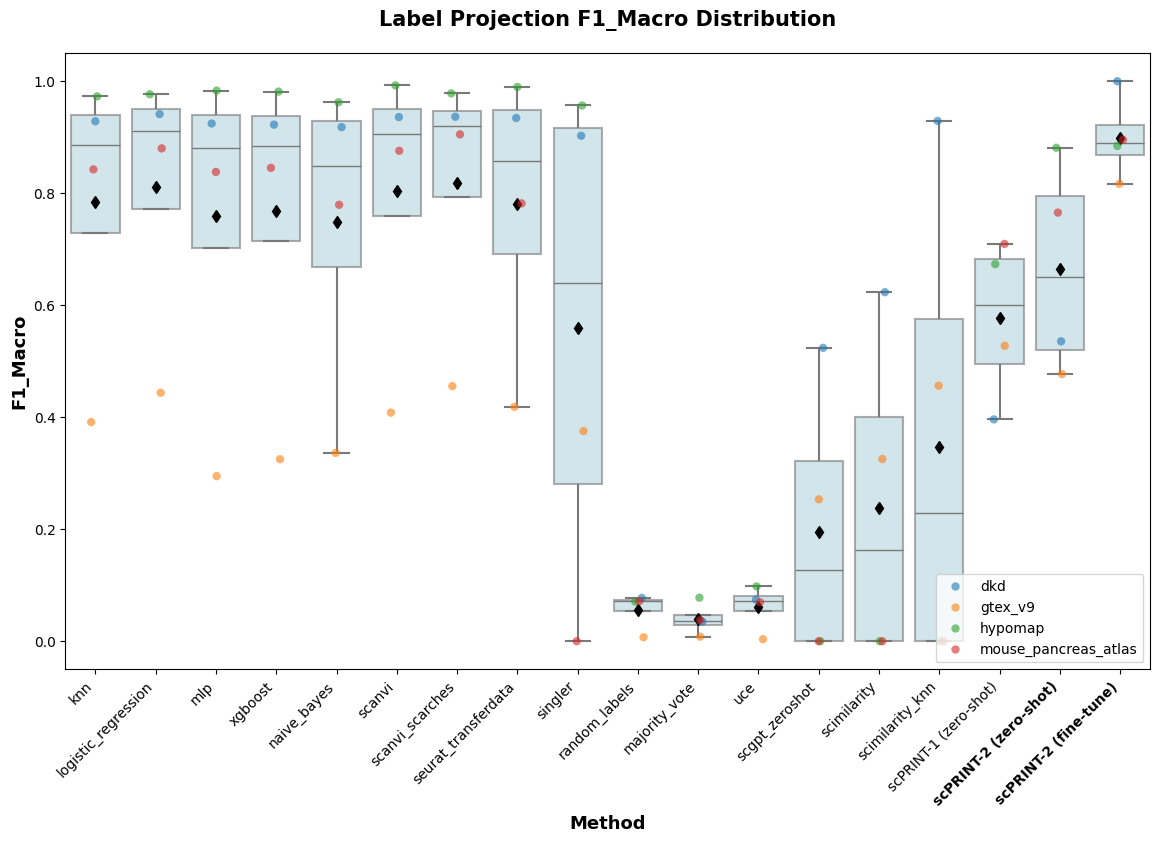


Summary Statistics:
                       count   mean    std    min    25%    50%    75%    max
Method                                                                       
knn                      4.0  0.784  0.267  0.391  0.730  0.886  0.940  0.973
logistic_regression      4.0  0.810  0.248  0.444  0.771  0.911  0.950  0.977
majority_vote            4.0  0.040  0.029  0.008  0.028  0.036  0.048  0.078
mlp                      4.0  0.760  0.316  0.295  0.702  0.881  0.939  0.983
naive_bayes              4.0  0.749  0.286  0.336  0.669  0.849  0.929  0.963
random_labels            4.0  0.057  0.033  0.007  0.055  0.071  0.073  0.077
scPRINT-1 (zero-shot)    4.0  0.577  0.144  0.396  0.495  0.601  0.682  0.710
scPRINT-2 (fine-tune)    4.0  0.899  0.076  0.817  0.867  0.890  0.922  1.000
scPRINT-2 (zero-shot)    4.0  0.665  0.191  0.477  0.521  0.650  0.794  0.881
scanvi                   4.0  0.803  0.268  0.408  0.759  0.906  0.950  0.993
scanvi_scarches          4.0  0.819  0.244 

In [53]:
# Alternative: Boxplot with stripplot overlay
fig, ax = plt.subplots(figsize=(14, 8))

# Melt the dataframe for seaborn
plot_data = toplot.T.reset_index().melt(
    id_vars="index", var_name="Method", value_name="Accuracy"
)
plot_data.columns = ["Dataset", "Method", "Accuracy"]

# Define color palette
colors = ["lightblue"] * len(plot_data["Method"].unique())
scprint_idx = list(plot_data["Method"].unique()).index("scPRINT-2 (zero-shot)")
colors[scprint_idx] = "coral"

# Create boxplot
sns.boxplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    ax=ax,
    color="lightblue",
    # palette=colors,
    # hue='Dataset',
    showmeans=True,
    fliersize=0,
    # medianprops=dict(color="black", linewidth=2.5),
    boxprops=dict(alpha=0.6, linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    meanprops={"marker": "d", "markerfacecolor": "black", "markeredgecolor": "black"},
    # flierprops=dict(marker="o", markerfacecolor="gray", markersize=5, alpha=0.5),
)

# Add strip plot to show individual points
sns.stripplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    hue="Dataset",
    ax=ax,
    # color="black",
    alpha=0.6,
    size=6,
    jitter=0.1,
)

# Styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel("F1_Macro", fontsize=13, fontweight="bold")
ax.set_xlabel("Method", fontsize=13, fontweight="bold")
# Then make the last label bold
labels = ax.get_xticklabels()
labels[-1].set_fontweight("bold")
labels[-2].set_fontweight("bold")
ax.set_title(
    "Label Projection F1_Macro Distribution", fontsize=15, fontweight="bold", pad=20
)
ax.set_ylim([-0.05, 1.05])
# ax.axhline(y=0.5, color="gray", linestyle="--", alpha=0.4, linewidth=1.5, zorder=0)
ax.legend(loc="lower right", fontsize=10)


# plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(plot_data.groupby("Method")["Accuracy"].describe().round(3))

/local/scratch/tmp/ipykernel_3469774/3835605354.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


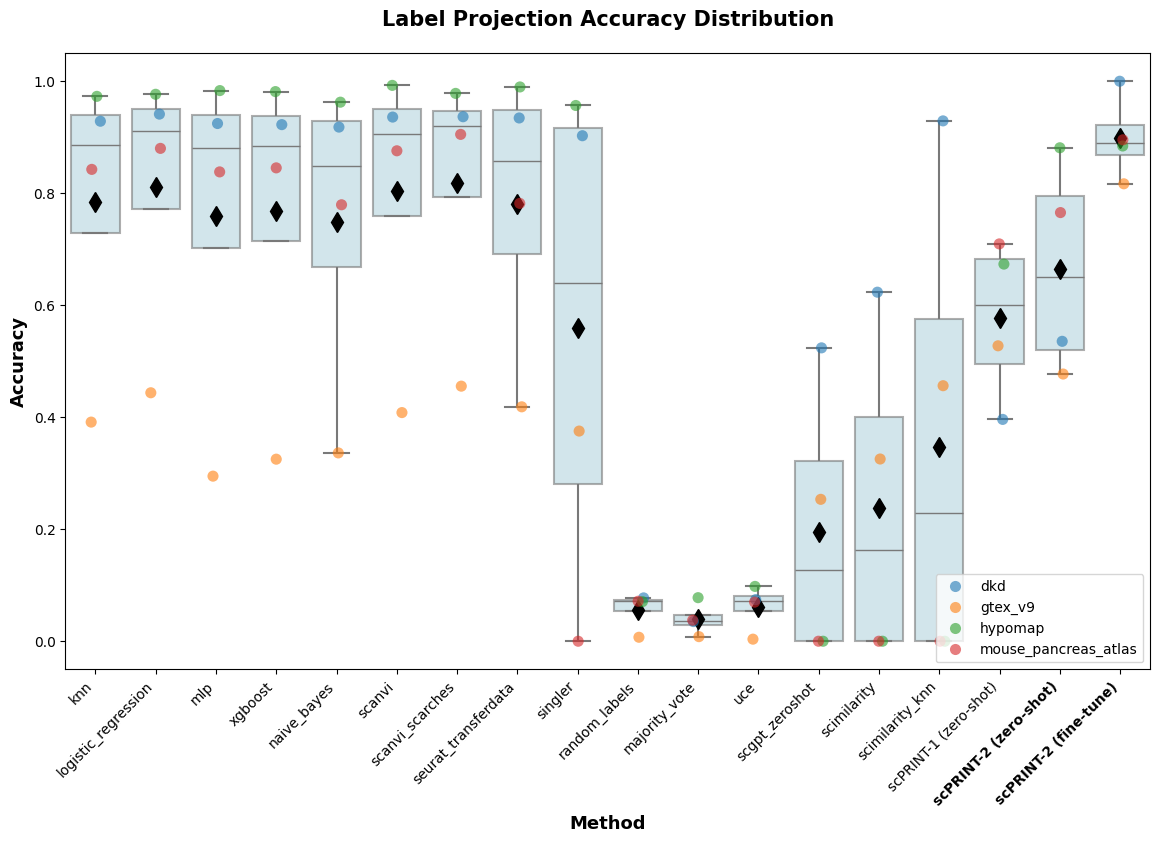


Summary Statistics:
                       count   mean    std    min    25%    50%    75%    max
Method                                                                       
knn                      4.0  0.784  0.267  0.391  0.730  0.886  0.940  0.973
logistic_regression      4.0  0.810  0.248  0.444  0.771  0.911  0.950  0.977
majority_vote            4.0  0.040  0.029  0.008  0.028  0.036  0.048  0.078
mlp                      4.0  0.760  0.316  0.295  0.702  0.881  0.939  0.983
naive_bayes              4.0  0.749  0.286  0.336  0.669  0.849  0.929  0.963
random_labels            4.0  0.057  0.033  0.007  0.055  0.071  0.073  0.077
scPRINT-1 (zero-shot)    4.0  0.577  0.144  0.396  0.495  0.601  0.682  0.710
scPRINT-2 (fine-tune)    4.0  0.899  0.076  0.817  0.867  0.890  0.922  1.000
scPRINT-2 (zero-shot)    4.0  0.665  0.191  0.477  0.521  0.650  0.794  0.881
scanvi                   4.0  0.803  0.268  0.408  0.759  0.906  0.950  0.993
scanvi_scarches          4.0  0.819  0.244 

In [60]:
# Alternative: Boxplot with stripplot overlay
fig, ax = plt.subplots(figsize=(14, 8))

# Melt the dataframe for seaborn
plot_data = toplot.T.reset_index().melt(
    id_vars="index", var_name="Method", value_name="Accuracy"
)
plot_data.columns = ["Dataset", "Method", "Accuracy"]

# Define color palette
colors = ["lightblue"] * len(plot_data["Method"].unique())
scprint_idx = list(plot_data["Method"].unique()).index("scPRINT-2 (zero-shot)")
colors[scprint_idx] = "coral"

# Create boxplot
sns.boxplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    ax=ax,
    # palette=colors,
    # hue='Dataset',
    color="lightblue",
    showmeans=True,
    fliersize=0,
    # medianprops=dict(color="black", linewidth=2.5),
    boxprops=dict(alpha=0.6, linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    meanprops={"marker": "d", "markerfacecolor": "black", "markeredgecolor": "black", "markersize":10},
    # flierprops=dict(marker="o", markerfacecolor="gray", markersize=5, alpha=0.5),
)

# Add strip plot to show individual points
sns.stripplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    hue="Dataset",
    ax=ax,
    # color="black",
    alpha=0.6,
    size=8,
    jitter=0.1,
)

# Styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel("Accuracy", fontsize=13, fontweight="bold")
ax.set_xlabel("Method", fontsize=13, fontweight="bold")
# Then make the last label bold
labels = ax.get_xticklabels()
labels[-1].set_fontweight("bold")
labels[-2].set_fontweight("bold")
ax.set_title(
    "Label Projection Accuracy Distribution", fontsize=15, fontweight="bold", pad=20
)
ax.set_ylim([-0.05, 1.05])
# ax.axhline(y=0.5, color="gray", linestyle="--", alpha=0.4, linewidth=1.5, zorder=0)
ax.legend(loc="lower right", fontsize=10)


# plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(plot_data.groupby("Method")["Accuracy"].describe().round(3))

In [18]:
emb = pd.DataFrame(
    data={
        "Isolated labels": [
            0.621361,
            0.387139,
            0.520031,
            0.544676,
        ],
        "KMeans NMI": [
            0.655657,
            0.570249,
            0.61668,
            0.516657,
        ],
        "KMeans ARI": [
            0.439839,
            0.225424,
            0.280595,
            0.35364,
        ],
        "Silhouette label": [
            0.562681,
            0.61172,
            0.503856,
            0.547946,
        ],
        "cLISI": [
            0.99952,
            1.0,
            0.996694,
            0.992218,
        ],
        "BRAS": [
            0.739654,
            0.786443,
            0.803204,
            0.761943,
        ],
        "iLISI": [
            0.043682,
            0.0,
            0.077398,
            0.19466,
        ],
        "KBET": [
            0.239296,
            0.844529,
            0.353033,
            0.212243,
        ],
        "Graph connectivity": [
            0.854861,
            0.826488,
            0.704139,
            0.857564,
        ],
        "PCR comparison": [
            0,
            0.41701,
            0.096562,
            0.736278,
        ],
        "Batch correction": [
            0.375498,
            0.574894,
            0.406867,
            0.552538,
        ],
        "Bio conservation": [
            0.655811,
            0.558906,
            0.583571,
            0.591027,
        ],
        "Total": [
            0.543686,
            0.565301,
            0.51289,
            0.575631,
        ],
    },
    index=["mouse_pancreas_atlas", "hypomap", "gtex_v9", "dkd"],
)

In [19]:
emb_v1 = pd.DataFrame(
    data={
        "Isolated labels": [
            0.566661,
            0.511032,
            0.509863,
            0.657649,
        ],
        "KMeans NMI": [0.645338, 0.238028, 0.567372, 0.426683],
        "KMeans ARI": [0.31973, 0.11652, 0.391042, 0.134236],
        "Silhouette label": [0.508098, 0.514257, 0.54277, 0.558273],
        "cLISI": [0.997801, 0.956136, 0.999368, 1.0],
        "BRAS": [0.816372, 0.74002, 0.682742, 0.778155],
        "iLISI": [0.052263, 0.150554, 0.03697, 0.0],
        "KBET": [0.314974, 0.169856, 0.193596, 0.849659],
        "Graph connectivity": [0.764403, 0.768737, 0.872287, 0.825514],
        "PCR comparison": [
            0,
            0.269315,
            0,
            0,
        ],
        "Batch correction": [0.389602, 0.419696, 0.357119, 0.490666],
        "Bio conservation": [0.607526, 0.467195, 0.63164, 0.525811],
        "Total": [0.520356, 0.448195, 0.521832, 0.511753],
    },
    index=[
        "gtex_v9",
        "dkd",
        "hypomap",
        "mouse_pancreas_atlas",
    ],
)

In [20]:
emb_ft = pd.DataFrame(
    data={
        "Isolated labels": [0.709752, 0.582134, 0.174419, 0.78184],
        "KMeans NMI": [0.792065, 0.804217, 0.747984, 0.799543],
        "KMeans ARI": [0.664956, 0.523745, 0.438869, 0.633139],
        "Silhouette label": [0.735049, 0.670654, 0.856273, 0.756145],
        "cLISI": [
            1.0,
            0.999889,
            1.0,
            1.0,
        ],
        "BRAS": [0.740067, 0.699155, 0.575672, 0.721834],
        "iLISI": [1.0, 0.037238, 0.0, 0.041376],
        "KBET": [0.264008, 0.335034, 0.83096, 0.274245],
        "Graph connectivity": [0.92774, 0.886459, 0.887689, 0.953396],
        "PCR comparison": [0.798539, 0, 0.533793, 0.177941],
        "Batch correction": [0.58494, 0.391577, 0.565623, 0.433758],
        "Bio conservation": [0.780365, 0.716128, 0.643509, 0.794133],
        "Total": [0.702195, 0.586308, 0.612354, 0.649983],
    },
    index=["dkd", "gtex_v9", "hypomap", "mouse_pancreas_atlas"],
)

In [24]:
res.keys()

dict_keys(['cellxgene_census/dkd', 'cellxgene_census/gtex_v9', 'cellxgene_census/hypomap', 'cellxgene_census/immune_cell_atlas', 'cellxgene_census/mouse_pancreas_atlas', 'cellxgene_census/tabula_sapiens'])

In [21]:
toplot = {}
names = []
for k, v in res.items():
    if k is None:
        continue
    names.append(k)
    for l, w in v.items():
        cell = 0

        for c in [
            "ari",
            "nmi",
            "isolated_label_asw",
            "clisi",
            "asw_label",
        ]:
            if w[c] == "NA":
                continue
            cell += w[c]
        cell /= 5
        batch = 0

        for b in [
            "pcr",
            "graph_connectivity",
            "asw_batch",
            "ilisi",
            "kbet",
        ]:
            if w[b] == "NA":
                continue
            batch += w[b]
        batch /= 5
        total = cell * 0.4 + batch * 0.6
        if l not in toplot:
            toplot[l] = []
        toplot[l].append(total)
    # print(f"         Bio: {cell:.3f}")
    # print(f"         Batch: {batch:.3f}")
    if "scPRINT-2 (zero-shot)" not in toplot:
        toplot["scPRINT-2 (zero-shot)"] = []
    if k.split("/")[1] not in emb.index:
        toplot["scPRINT-2 (zero-shot)"].append(0)
    else:
        toplot["scPRINT-2 (zero-shot)"].append(emb.loc[k.split("/")[1], "Total"])
    if "scPRINT-1 (zero-shot)" not in toplot:
        toplot["scPRINT-1 (zero-shot)"] = []
    if k.split("/")[1] not in emb_v1.index:
        toplot["scPRINT-1 (zero-shot)"].append(0)
    else:
        toplot["scPRINT-1 (zero-shot)"].append(emb_v1.loc[k.split("/")[1], "Total"])
    if "scPRINT-2 (fine-tune)" not in toplot:
        toplot["scPRINT-2 (fine-tune)"] = []
    if k.split("/")[1] not in emb_ft.index:
        toplot["scPRINT-2 (fine-tune)"].append(0)
    else:
        toplot["scPRINT-2 (fine-tune)"].append(emb_ft.loc[k.split("/")[1], "Total"])
toplot = pd.DataFrame(data=toplot, index=names).T

In [22]:
toplot = toplot.loc[:, toplot.loc["scPRINT-2 (zero-shot)"].values != 0].drop(
    index=["geneformer", "true_labels", "scgpt_finetuned", "scprint"], errors="ignore"
)
toplot

,cellxgene_census/dkd,cellxgene_census/gtex_v9,cellxgene_census/hypomap,cellxgene_census/mouse_pancreas_atlas
batchelor_fastmnn,0.626968,0.538368,0.477280,0.560876
batchelor_mnn_correct,0.600660,0.000000,0.000000,0.000000
bbknn,0.364520,0.334964,0.337716,0.330144
combat,0.643008,0.642372,0.554332,0.630924
embed_cell_types,0.791124,0.762484,0.681564,0.748560
embed_cell_types_jittered,0.789660,0.761776,0.682476,0.748632
harmony,0.659904,0.617280,0.520824,0.592216
harmonypy,0.657424,0.617920,0.522252,0.588528
liger,0.713152,0.554760,0.522148,0.569000
mnnpy,0.413640,0.000000,0.000000,0.000000


In [42]:
toplot = toplot.loc[
    [
        "no_integration_batch",
        "shuffle_integration_by_batch",
        "shuffle_integration_by_cell_type",
        "embed_cell_types",
        "embed_cell_types_jittered",
        "batchelor_mnn_correct",
        "mnnpy",
        "bbknn",
        "scanorama",
        "batchelor_fastmnn",
        "harmony",
        "combat",
        "harmonypy",
        "scalex",
        "scanvi",
        "pyliger",
        "liger",
        "scvi",
        "no_integration",
        "shuffle_integration",
        "uce",
        "scgpt_zeroshot",
        "scimilarity",
        "scPRINT-1 (zero-shot)",
        "scPRINT-2 (zero-shot)",
        "scPRINT-2 (fine-tune)",
    ]
]

/local/scratch/tmp/ipykernel_3469774/1699574447.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


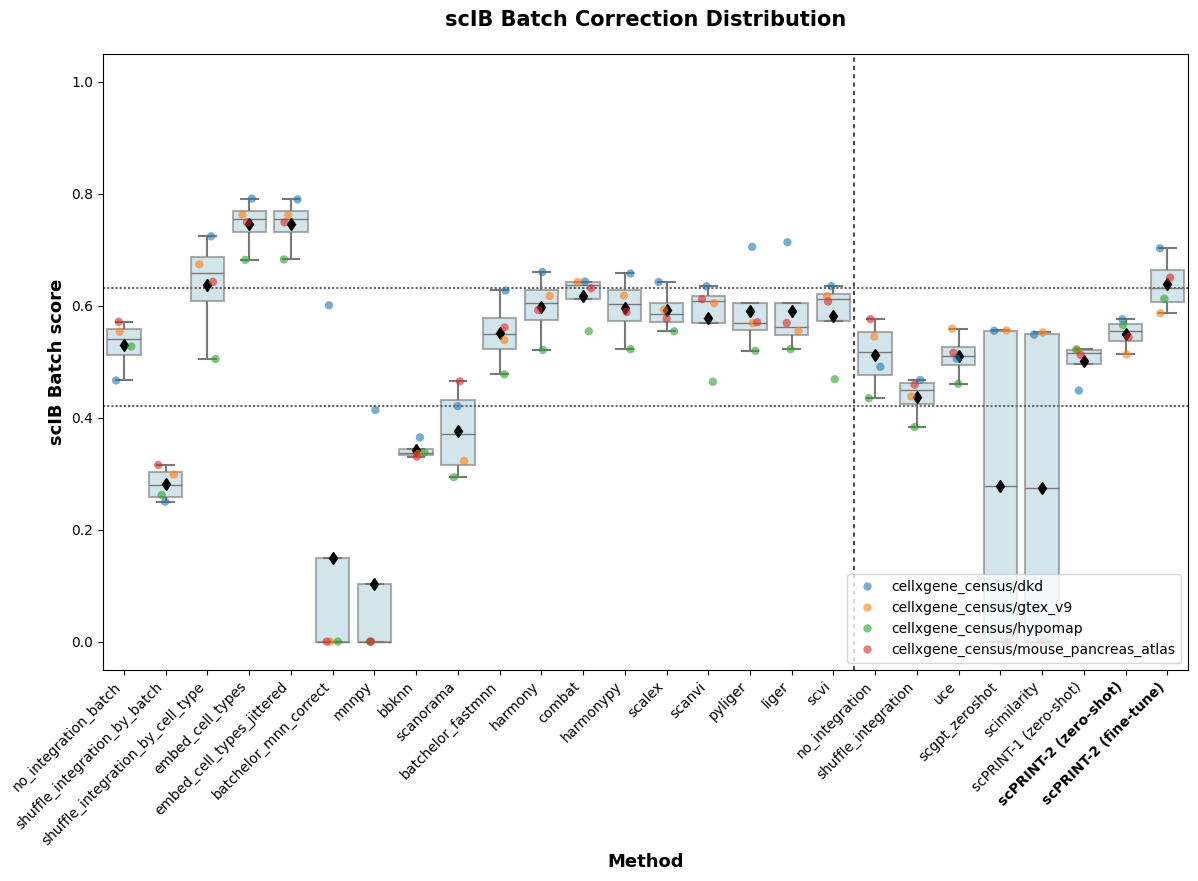


Summary Statistics:
                                  count   mean    std    min    25%    50%  \
Method                                                                       
batchelor_fastmnn                   4.0  0.551  0.062  0.477  0.523  0.550   
batchelor_mnn_correct               4.0  0.150  0.300  0.000  0.000  0.000   
bbknn                               4.0  0.342  0.015  0.330  0.334  0.336   
combat                              4.0  0.618  0.043  0.554  0.612  0.637   
embed_cell_types                    4.0  0.746  0.046  0.682  0.732  0.756   
embed_cell_types_jittered           4.0  0.746  0.045  0.682  0.732  0.755   
harmony                             4.0  0.598  0.058  0.521  0.574  0.605   
harmonypy                           4.0  0.597  0.057  0.522  0.572  0.603   
liger                               4.0  0.590  0.085  0.522  0.547  0.562   
mnnpy                               4.0  0.103  0.207  0.000  0.000  0.000   
no_integration                      4.0  0.

In [43]:
# Alternative: Boxplot with stripplot overlay
fig, ax = plt.subplots(figsize=(14, 8))

# Melt the dataframe for seaborn
plot_data = toplot.T.reset_index().melt(
    id_vars="index", var_name="Method", value_name="Accuracy"
)
plot_data.columns = ["Dataset", "Method", "Accuracy"]

# Define color palette
colors = ["lightblue"] * len(plot_data["Method"].unique())
scprint_idx = list(plot_data["Method"].unique()).index("scPRINT-2 (zero-shot)")
colors[scprint_idx] = "coral"

# Create boxplot
sns.boxplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    ax=ax,
    color="lightblue",
    # palette=colors,
    # hue='Dataset',
    showmeans=True,
    fliersize=0,
    # medianprops=dict(color="black", linewidth=2.5),
    boxprops=dict(alpha=0.6, linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    meanprops={"marker": "d", "markerfacecolor": "black", "markeredgecolor": "black"},
    # flierprops=dict(marker="o", markerfacecolor="gray", markersize=5, alpha=0.5),
)

# Add strip plot to show individual points
sns.stripplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    hue="Dataset",
    ax=ax,
    # color="black",
    alpha=0.6,
    size=6,
    jitter=0.2,
)

# Styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel("scIB Batch score", fontsize=13, fontweight="bold")
ax.set_xlabel("Method", fontsize=13, fontweight="bold")
# Then make the last label bold
labels = ax.get_xticklabels()
labels[-1].set_fontweight("bold")
labels[-2].set_fontweight("bold")
ax.set_title(
    "scIB Batch Correction Distribution", fontsize=15, fontweight="bold", pad=20
)
ax.set_ylim([-0.05, 1.05])
# ax.axhline(y=0.5, color="gray", linestyle="--", alpha=0.4, linewidth=1.5, zorder=0)
ax.legend(loc="lower right", fontsize=10)
ax.axvline(17.5, color=".3", dashes=(2, 2))
ax.axhline(0.632, color=".4", dashes=(1, 1))
ax.axhline(0.42, color=".4", dashes=(1, 1))
# plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(plot_data.groupby("Method")["Accuracy"].describe().round(3))

/local/scratch/tmp/ipykernel_3469774/557033384.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


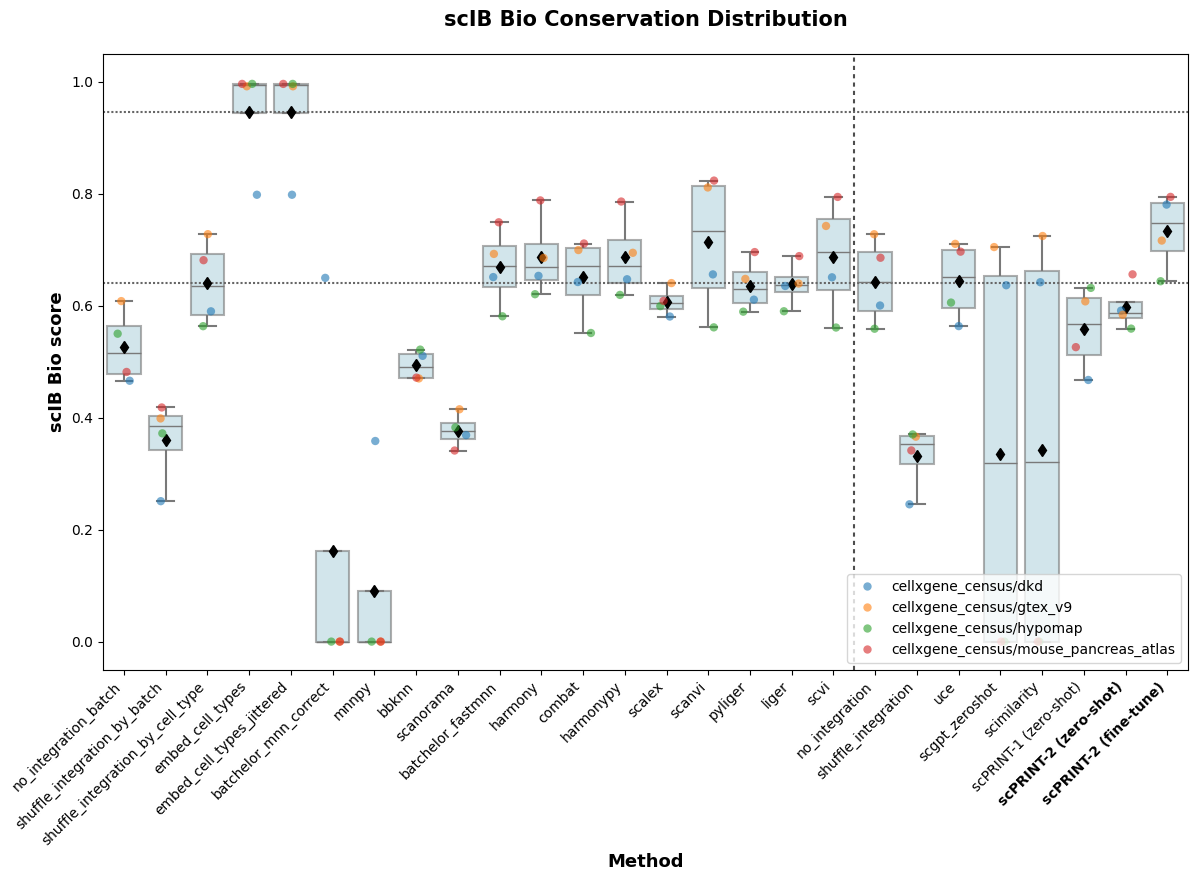


Summary Statistics:
                                  count   mean    std    min    25%    50%  \
Method                                                                       
batchelor_fastmnn                   4.0  0.668  0.071  0.581  0.633  0.672   
batchelor_mnn_correct               4.0  0.162  0.325  0.000  0.000  0.000   
bbknn                               4.0  0.493  0.026  0.470  0.471  0.491   
combat                              4.0  0.651  0.073  0.551  0.619  0.671   
embed_cell_types                    4.0  0.945  0.098  0.798  0.943  0.994   
embed_cell_types_jittered           4.0  0.945  0.098  0.798  0.943  0.994   
harmony                             4.0  0.687  0.072  0.620  0.645  0.669   
harmonypy                           4.0  0.687  0.073  0.619  0.640  0.671   
liger                               4.0  0.638  0.040  0.590  0.624  0.637   
mnnpy                               4.0  0.090  0.179  0.000  0.000  0.000   
no_integration                      4.0  0.

In [39]:
# Alternative: Boxplot with stripplot overlay
fig, ax = plt.subplots(figsize=(14, 8))

# Melt the dataframe for seaborn
plot_data = toplot.T.reset_index().melt(
    id_vars="index", var_name="Method", value_name="Accuracy"
)
plot_data.columns = ["Dataset", "Method", "Accuracy"]

# Define color palette
colors = ["lightblue"] * len(plot_data["Method"].unique())
scprint_idx = list(plot_data["Method"].unique()).index("scPRINT-2 (zero-shot)")
colors[scprint_idx] = "coral"

# Create boxplot
sns.boxplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    ax=ax,
    color="lightblue",
    # palette=colors,
    # hue='Dataset',
    showmeans=True,
    fliersize=0,
    # medianprops=dict(color="black", linewidth=2.5),
    boxprops=dict(alpha=0.6, linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    meanprops={"marker": "d", "markerfacecolor": "black", "markeredgecolor": "black"},
    # flierprops=dict(marker="o", markerfacecolor="gray", markersize=5, alpha=0.5),
)

# Add strip plot to show individual points
sns.stripplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    hue="Dataset",
    ax=ax,
    # color="black",
    alpha=0.6,
    size=6,
    jitter=0.2,
)

# Styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel("scIB Bio score", fontsize=13, fontweight="bold")
ax.set_xlabel("Method", fontsize=13, fontweight="bold")
# Then make the last label bold
labels = ax.get_xticklabels()
labels[-1].set_fontweight("bold")
labels[-2].set_fontweight("bold")
ax.set_title(
    "scIB Bio Conservation Distribution", fontsize=15, fontweight="bold", pad=20
)
ax.set_ylim([-0.05, 1.05])
# ax.axhline(y=0.5, color="gray", linestyle="--", alpha=0.4, linewidth=1.5, zorder=0)
ax.legend(loc="lower right", fontsize=10)
ax.axvline(17.5, color=".3", dashes=(2, 2))
ax.axhline(0.945, color=".4", dashes=(1, 1))
ax.axhline(0.64, color=".4", dashes=(1, 1))
# plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(plot_data.groupby("Method")["Accuracy"].describe().round(3))

/local/scratch/tmp/ipykernel_3469774/3659466378.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


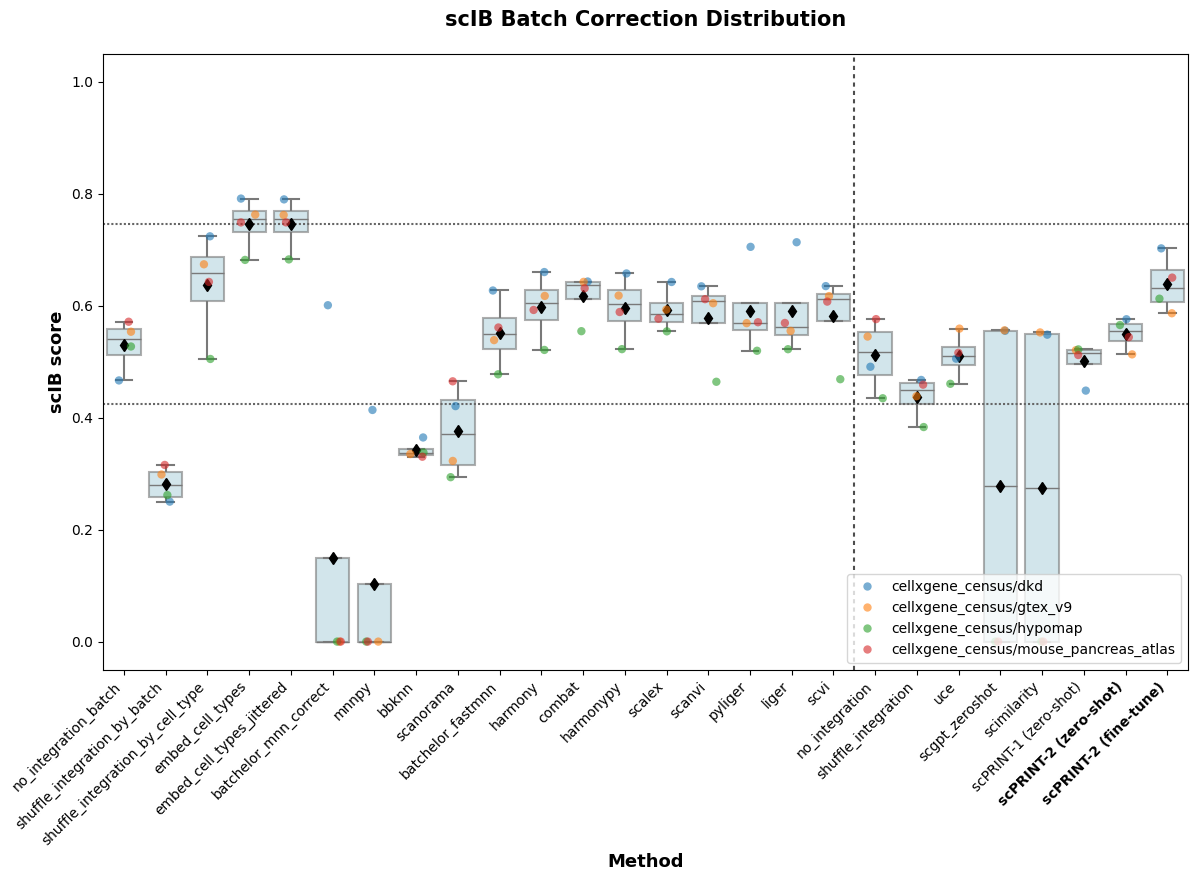


Summary Statistics:
                                  count   mean    std    min    25%    50%  \
Method                                                                       
batchelor_fastmnn                   4.0  0.551  0.062  0.477  0.523  0.550   
batchelor_mnn_correct               4.0  0.150  0.300  0.000  0.000  0.000   
bbknn                               4.0  0.342  0.015  0.330  0.334  0.336   
combat                              4.0  0.618  0.043  0.554  0.612  0.637   
embed_cell_types                    4.0  0.746  0.046  0.682  0.732  0.756   
embed_cell_types_jittered           4.0  0.746  0.045  0.682  0.732  0.755   
harmony                             4.0  0.598  0.058  0.521  0.574  0.605   
harmonypy                           4.0  0.597  0.057  0.522  0.572  0.603   
liger                               4.0  0.590  0.085  0.522  0.547  0.562   
mnnpy                               4.0  0.103  0.207  0.000  0.000  0.000   
no_integration                      4.0  0.

In [45]:
# Alternative: Boxplot with stripplot overlay
fig, ax = plt.subplots(figsize=(14, 8))

# Melt the dataframe for seaborn
plot_data = toplot.T.reset_index().melt(
    id_vars="index", var_name="Method", value_name="Accuracy"
)
plot_data.columns = ["Dataset", "Method", "Accuracy"]

# Define color palette
colors = ["lightblue"] * len(plot_data["Method"].unique())
scprint_idx = list(plot_data["Method"].unique()).index("scPRINT-2 (zero-shot)")
colors[scprint_idx] = "coral"

# Create boxplot
sns.boxplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    ax=ax,
    color="lightblue",
    # palette=colors,
    # hue='Dataset',
    showmeans=True,
    fliersize=0,
    # medianprops=dict(color="black", linewidth=2.5),
    boxprops=dict(alpha=0.6, linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    meanprops={"marker": "d", "markerfacecolor": "black", "markeredgecolor": "black"},
    # flierprops=dict(marker="o", markerfacecolor="gray", markersize=5, alpha=0.5),
)

# Add strip plot to show individual points
sns.stripplot(
    data=plot_data,
    x="Method",
    y="Accuracy",
    hue="Dataset",
    ax=ax,
    # color="black",
    alpha=0.6,
    size=6,
    jitter=0.2,
)

# Styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel("scIB score", fontsize=13, fontweight="bold")
ax.set_xlabel("Method", fontsize=13, fontweight="bold")
# Then make the last label bold
labels = ax.get_xticklabels()
labels[-1].set_fontweight("bold")
labels[-2].set_fontweight("bold")
ax.set_title(
    "scIB Batch Correction Distribution", fontsize=15, fontweight="bold", pad=20
)
ax.set_ylim([-0.05, 1.05])
# ax.axhline(y=0.5, color="gray", linestyle="--", alpha=0.4, linewidth=1.5, zorder=0)
ax.legend(loc="lower right", fontsize=10)
ax.axvline(17.5, color=".3", dashes=(2, 2))
ax.axhline(0.745, color=".4", dashes=(1, 1))
ax.axhline(0.425, color=".4", dashes=(1, 1))
# plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(plot_data.groupby("Method")["Accuracy"].describe().round(3))